In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import symmetric_top as sy
import euler_omega as eo
from numpy import linalg as la

We consider a top that is spinning:

$\theta(0)=\theta_0$

$\dot{\theta}(0) = \dot{\theta}_0$

$\dot{\psi}(0)=\dot{\psi}_0$

which implies

$\alpha = \dot{\theta}_0^2$

$ a = \frac{I_3}{I}\dot{\psi}_0 $

$ b = a\cos(\theta_0) $

In [2]:
# condition 1
#cond = np.array([np.pi/6.0, 1.0, 1.0, 2.0])
#num_pers = 3
# condition 2 slower spinning
cond = np.array([np.pi/6.0, 1.0, 0.5, 2.0])
num_pers = 3

In [3]:
beta = 0.0
theta_0 = cond[0]
d_theta_0 = cond[1]
d_psi_0 = cond[2]
i_rat = cond[3]

In [4]:
alpha = d_theta_0**2
a = i_rat*d_psi_0
b = a*np.cos(theta_0)

In [5]:
st = sy.SymTopIniCond(alpha, beta, a, b, i_rat)

Motion confined between  0.126340127572  and  1.69713645437
Half period is 2.2214414689402058


In [6]:
print('This is the smallest value', st.u_l)
print('This is the largest value ', st.u_r)
print('This is u prime ', st.u_prime)

This is the smallest value -0.12600429248272796
This is the largest value  0.9920296962670261
This is u prime  0.866025403784


In [7]:
num_pnts = 200
num_periods = num_pers
sol = st.solv_eqn(num_pnts, num_periods)

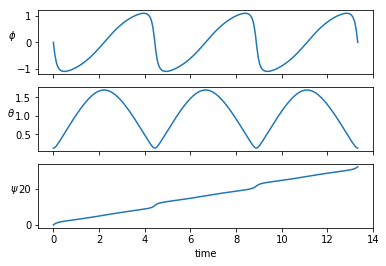

In [8]:
fig, ax = plt.subplots(3, sharex=True)
var = [r'$\phi$', r'$\theta$', r'$\psi$']
for ind in range(3):
    ax[ind].plot(st.time, sol[:, ind])    
    yl = ax[ind].set_ylabel(var[ind])
    yl.set_rotation(0)
ax[2].set_xlabel('time')
plt.show()

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


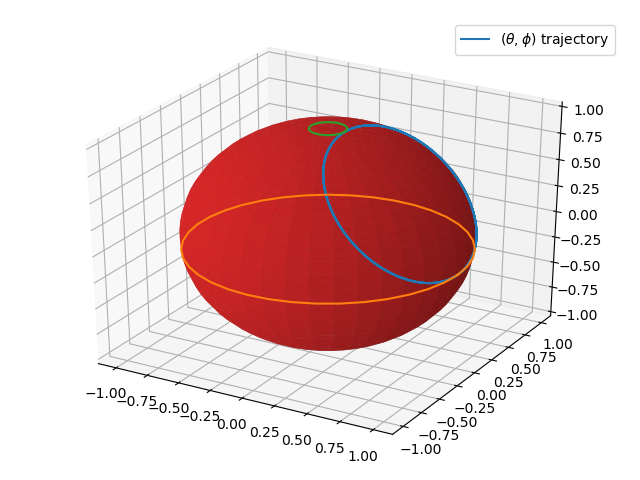

In [10]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.sin(sol[:, 1])*np.cos(sol[:, 0])
y = np.sin(sol[:, 1])*np.sin(sol[:, 0])
z = np.cos(sol[:, 1])
ax.plot(x, y, z, label=r'$(\theta, \phi)$ trajectory')

num = 40
us = np.linspace(0, np.pi, num)
vs = np.linspace(0, 2 * np.pi, num)

theta = [st.th_1, st.th_2]
for inv, th in enumerate(theta):
    x = np.sin(th)*np.cos(vs)
    y = np.sin(th)*np.sin(vs)
    z = np.cos(th)
    ax.plot(x, y, z)

xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)

ax.legend()
fig.tight_layout()
plt.show()

Let us look at the vector ${\vec \omega}$ and plot it in the unit sphere:

<IPython.core.display.Javascript object>


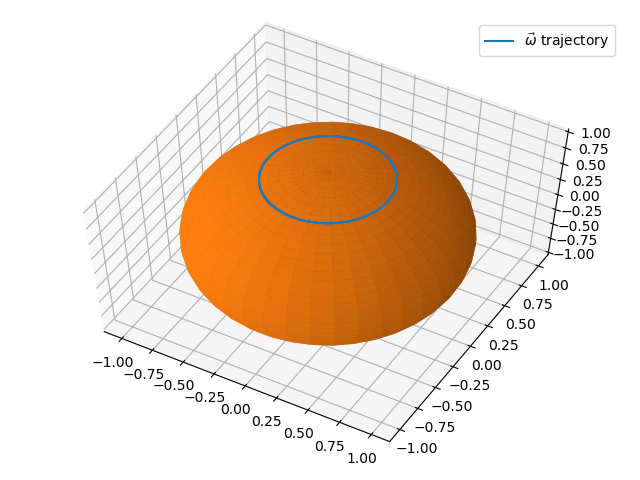

In [63]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

# define angle and velocity
angle_euler = sol
velo_euler = np.zeros_like(angle_euler)

# define a helper function that contains derivatives
velo_helper = st.ode_int(st.solv_eqn.T, 0.0)

# The order of the Euler angles has been chosen as [he, theta, phi, psi]
velo_euler[:, 0] = velo_helper.T[:, 2]
velo_euler[:, 1] = velo_helper.T[:, 1]
velo_euler[:, 2] = velo_helper.T[:, 3]
# remember that :math:'\\dot{\\theta}=-\\dot{u}//sin(\\theta)`
velo_euler[:, 1] = - velo_euler[:, 1]/np.sin(angle_euler[:, 1])

omega = eo.omega_body(angle_euler.T, velo_euler.T)
#omega = eo.omega_reference(angle_euler.T, velo_euler.T)

w = omega/la.norm(omega, axis=0)

ax.plot(w[0], w[1], w[2],  label=r'${\vec \omega}$ trajectory')

num = 40
us = np.linspace(0, np.pi, num)
vs = np.linspace(0, 2 * np.pi, num)

xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)

ax.legend()
fig.tight_layout()
plt.show()

As discussed in class ${\vec \omega}$ precesses in time!